# Homework 2 Programming Problem 6 (5 points)

When flow is directed across a pin fin heat sink, increasing fluid velocity can improve the heat transfer, making the heat sink more effective. 

You have been given a dataset containing measurements for such a scenario, which contains the following:
- Input: Reynolds Number of air flowing past the heat sink
- Output: Heat transfer coefficient of the heat sink, in W/(m $^2$) K

Your job is to train a model on this data to predict the heat transfer coefficient, given Reynolds number as input. You will use a high-order polynomial 

Start by loading the data in the following cell:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_regression(x_data, y_data, x_reg, y_reg, title=""):
    plt.figure()

    plt.scatter(x_data.flatten(), y_data.flatten(), label="Data", c="black")
    plt.plot(x_reg.flatten(), y_reg.flatten(), label="Fit")

    plt.legend(loc="upper left")
    plt.xlabel(r"$Re / 1000$")
    plt.ylabel(r"h, $W/m^2 K$")
    plt.xlim(0,6)
    plt.ylim(50,200)
    plt.title(title)
    plt.show()

deg = 5
x = np.array([1.010,2.000,2.990,4.100,5.020])
y = np.array([75.1, 104.0,100.6,138.8,150.8])
X = np.vander(x,deg)

xreg = np.linspace(0,6)
Xreg = np.vander(xreg,deg)

## Least Squares Regression
As we have done for previous problems, we can do least squares regression by computing the pseudo-inverse of the design matrix.
Notice how the model performs beyond the training data.

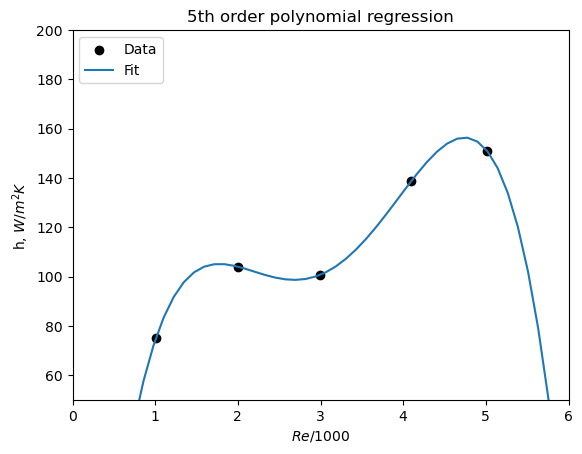

In [2]:
w = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1,1)
yreg = Xreg @ w
plot_data_with_regression(x, y, xreg, yreg, "5th order polynomial regression")

## L2 Regularization
Notice that the plot above reveals that our fifth-order model is overfitting to the data. Let's try applying L2 regularization to fix this. In the lecture, the closed-form solution to least squares with L2 regularization was:
$$w = (X'X + \lambda I_m)^{-1} X' y $$

where $I_m$ is the identity matrix, but with zero in the bias row/column instead of 1; $\lambda$ is regularization strength; $X'$ is the design matrix and $y$ column vector output.

Complete the function below to compute this w for a given lambda:

In [5]:
def get_regularized_w(L):
    I_m = np.eye(deg)
    I_m[-1,-1] = 0

    # YOUR CODE GOES HERE
    # return regularized w
    regular_w = np.linalg.inv(X.T @ X + L*I_m) @ X.T @ y.reshape(-1,1)
    return regular_w


## Testing different lambda values

With the above function written, we can compute w for some different values of lambda and decide which is qualitatively best.

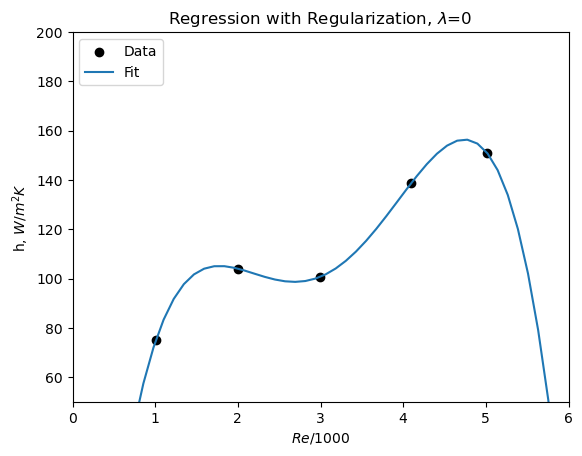

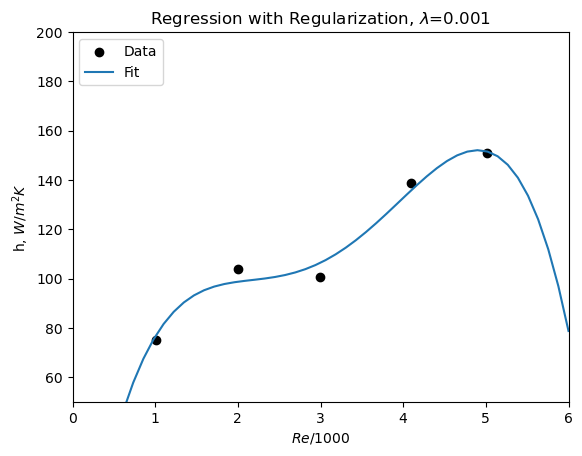

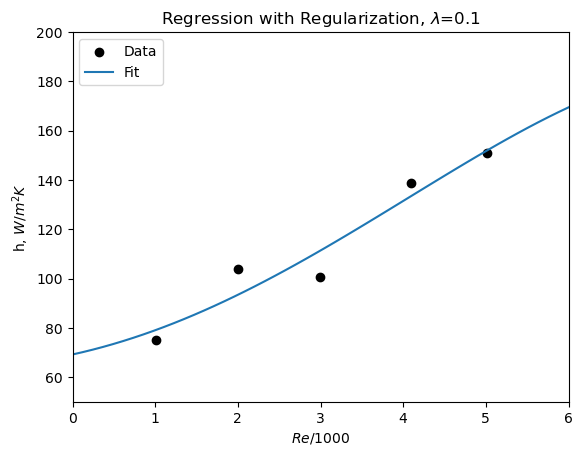

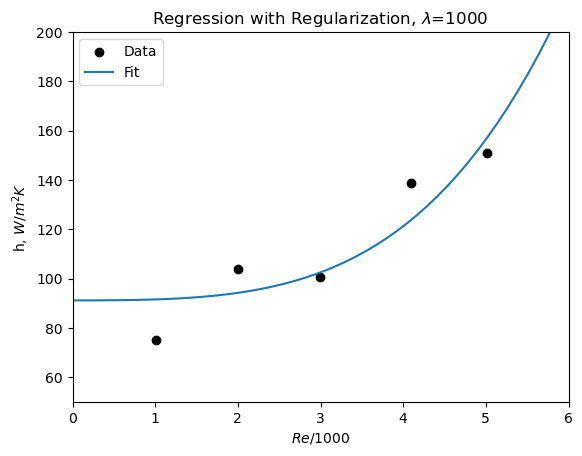

In [6]:
for L in [0,.001,0.1,1000]:
    w = get_regularized_w(L)
    yreg = Xreg @ w
    plot_data_with_regression(x, y, xreg, yreg, 
                              f"Regression with Regularization, $\lambda$={L}")

## Model Selection

Which value of lambda appears to yield the "best" model?

0.1